In [ ]:
# Created 09 Jun 23
# To do KDE plots of emissions intensity (EI) of S0-S4 to show distribution of
# datapoints in each scenario. Includes all 166 sites.
# check Python script version: 'emi_kde_S0-S4'
# Last part of code is more for plots trials (after melting data to have it in long-form instead)
# Some plots are saved in words: 'Chapter 5 thesis graveyard' & 'Ch5_prelresults_9Jun23' 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"

cwd = os.getcwd()
cwd

os.chdir(path)

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [3]:
# Imports/reads csv of Emissions intensity of S0-S4 (created with another code)
data = pd.read_csv("emi_s0_s4.csv")
data.describe().round(2) 
# i copied it from the Spyder console into excel (see Info tab in excel 'Ch5 LCA Project Jua (9Jun23)')

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
count,166.00,166.00,166.00,166.00,166.00
mean,487.80,377.51,306.95,259.76,243.54
std,285.80,163.96,144.89,105.51,97.54
min,130.72,194.90,165.94,133.97,132.02
25%,302.14,281.23,223.91,195.73,182.35
50%,404.83,329.72,271.62,235.90,218.03
75%,601.45,418.43,343.59,283.80,266.04
max,2195.91,1582.41,1512.61,815.83,759.69


In [4]:
# Import library and set format for plotting
import seaborn as sns

sns.set(rc={"figure.dpi":300})
sns.set_context("notebook")  # change to paper maybe? I prefer notebook style i think...
sns.set_style("ticks") # with axis ticks, no background lines
# sns.set_style("whitegrid")

In [5]:
# To format plot with scenarios colors (including S0)
print(sns.color_palette("Set2").as_hex()) # to know colours of palette

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


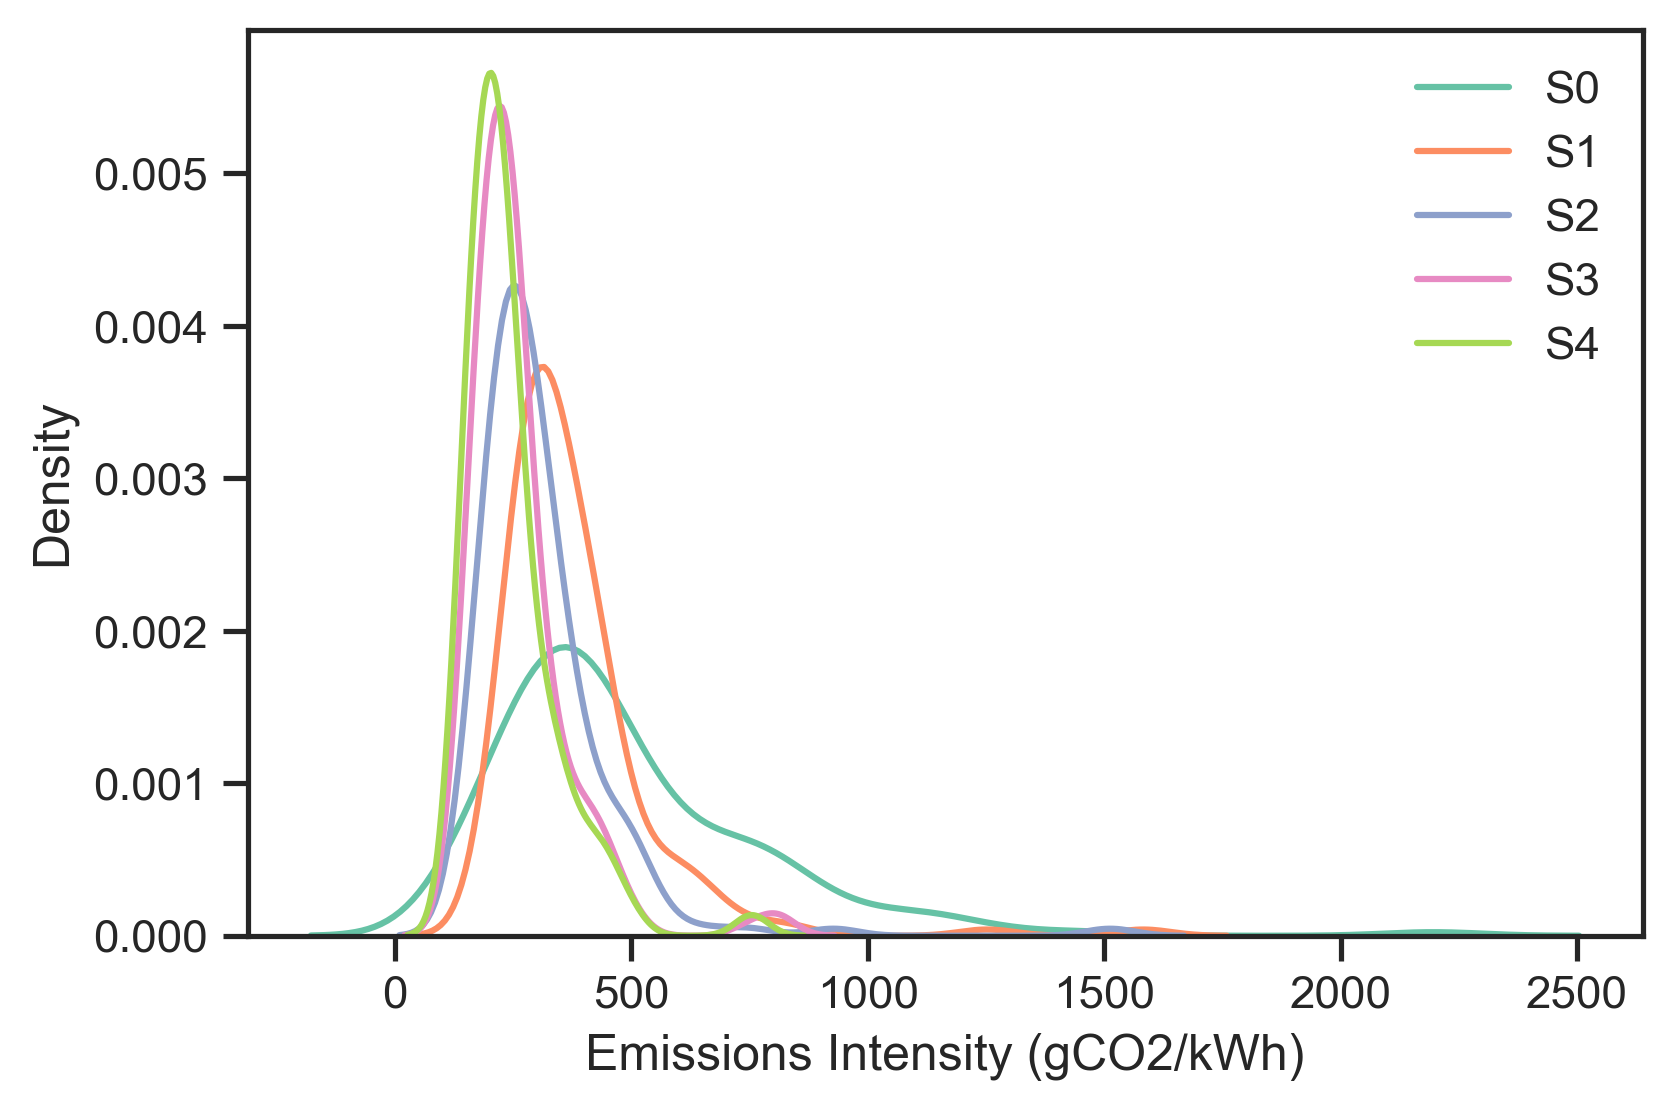

In [6]:
colors5 = ['#66c2a5', "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]

# Final version of plot (for now) - FIG 1 LCA in word 'Ch5_prelresults_9Jun23'
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=data.S0_EI, color=colors5[0], label="S0", ax=ax) # fill=True
sns.kdeplot(data=data.S1_EI, color=colors5[1],label="S1", ax=ax) # fill=True
sns.kdeplot(data=data.S2_EI, color=colors5[2],label="S2", ax=ax) # fill=True
sns.kdeplot(data=data.S3_EI, color=colors5[3],label="S3", ax=ax) # fill=True
sns.kdeplot(data=data.S4_EI, color=colors5[4],label="S4", ax=ax) # fill=True
plt.xlabel("Emissions Intensity (gCO2/kWh)") # or "Emissions Intensity (gCO2eq./kWh)"
plt.legend(frameon=False)

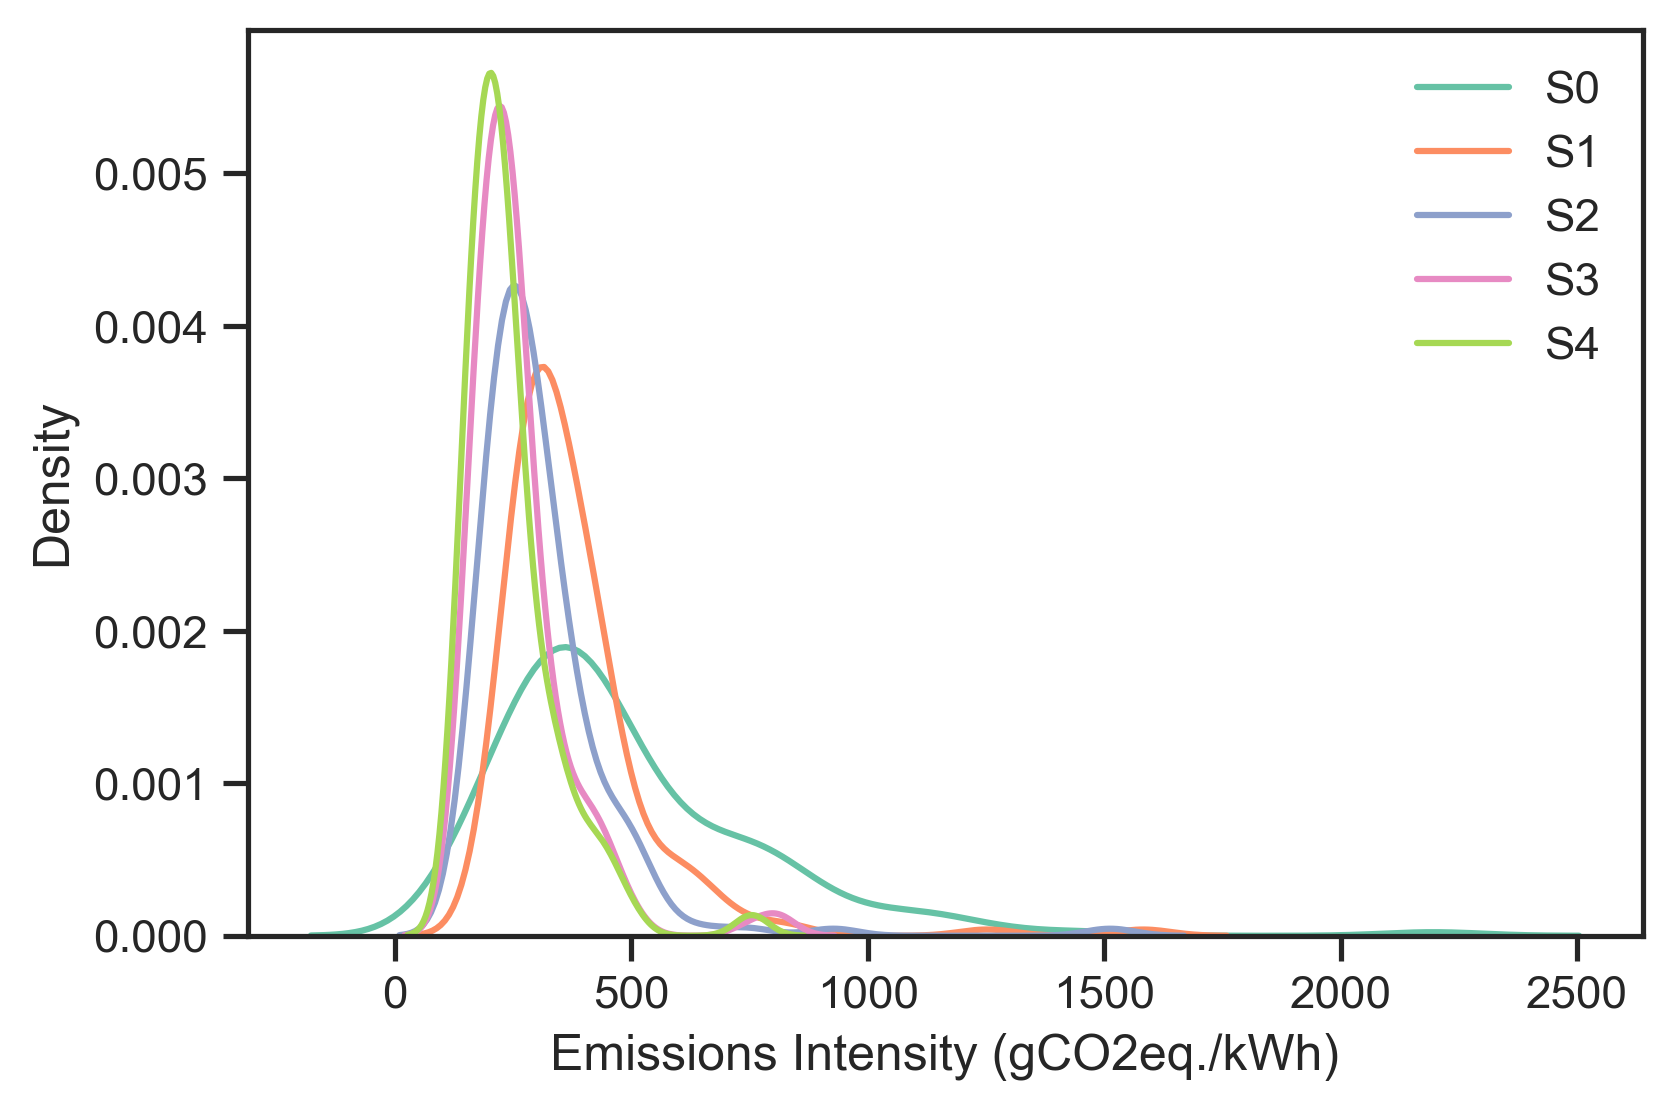

In [7]:
# Same as above but adding "eq." in x-axis name
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=data.S0_EI, color=colors5[0], label="S0", ax=ax) # fill=True
sns.kdeplot(data=data.S1_EI, color=colors5[1],label="S1", ax=ax) # fill=True
sns.kdeplot(data=data.S2_EI, color=colors5[2],label="S2", ax=ax) # fill=True
sns.kdeplot(data=data.S3_EI, color=colors5[3],label="S3", ax=ax) # fill=True
sns.kdeplot(data=data.S4_EI, color=colors5[4],label="S4", ax=ax) # fill=True
plt.xlabel("Emissions Intensity (gCO2eq./kWh)") # 
plt.legend(frameon=False)

In [8]:
# END OF PLOT. FOLLOWING CODE IS TO TRY TO PLOT SCENARIOS ONE BY ONE BY MELTING THE DATA (converting to long-form data)
# Trying to melt data to plot for one Scenario only, specifying columns names:
test2= data.melt(id_vars=["Site_name"], value_vars=["S0_EI"], var_name="Scenario", value_name="EI")
test2.head()

,Site_name,Scenario,EI
0,AIC_Nadoto_Primary_School,S0_EI,565.902
1,AIC_Nayanaekaton_Primary_School,S0_EI,723.681
2,A_IC_Gangani_Primary_School,S0_EI,422.405
3,Abagarse_Primary_School,S0_EI,796.500
4,Akadeli_Primary_School,S0_EI,335.192


In [9]:
# Melting df to have all 5 scenarios in long-form to plot better 
data_melt= data.melt(id_vars=["Site_name"], value_vars=["S0_EI", "S1_EI",  "S2_EI",  "S3_EI",  "S4_EI",], var_name="Scenario", value_name="EI")
data_melt #830 rows because 166 sites * 5 scenarios 

,Site_name,Scenario,EI
0,AIC_Nadoto_Primary_School,S0_EI,565.902
1,AIC_Nayanaekaton_Primary_School,S0_EI,723.681
2,A_IC_Gangani_Primary_School,S0_EI,422.405
3,Abagarse_Primary_School,S0_EI,796.500
4,Akadeli_Primary_School,S0_EI,335.192
...,...,...,...
825,Watala_Primary_School,S4_EI,412.548
826,Werugha_Health_facility,S4_EI,241.104
827,Yapha_Primary_School,S4_EI,259.284
828,Ziwani_Primary_School,S4_EI,449.643


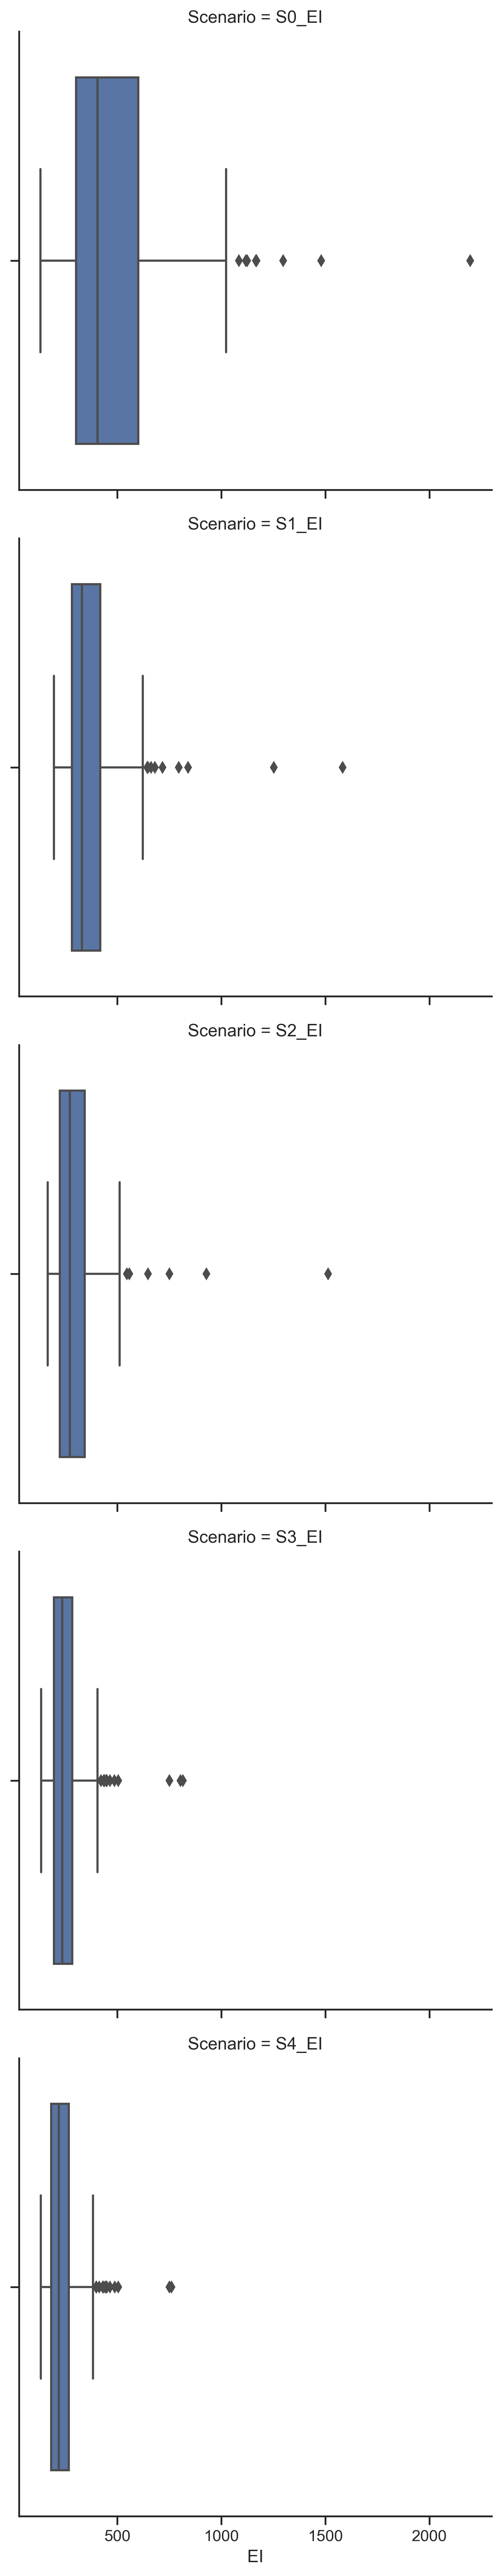

In [10]:
# Boxplot per scenario sharing x-axis with long-form data format
g = sns.catplot(data=data_melt, x="EI", row="Scenario", kind="box", orient="h")

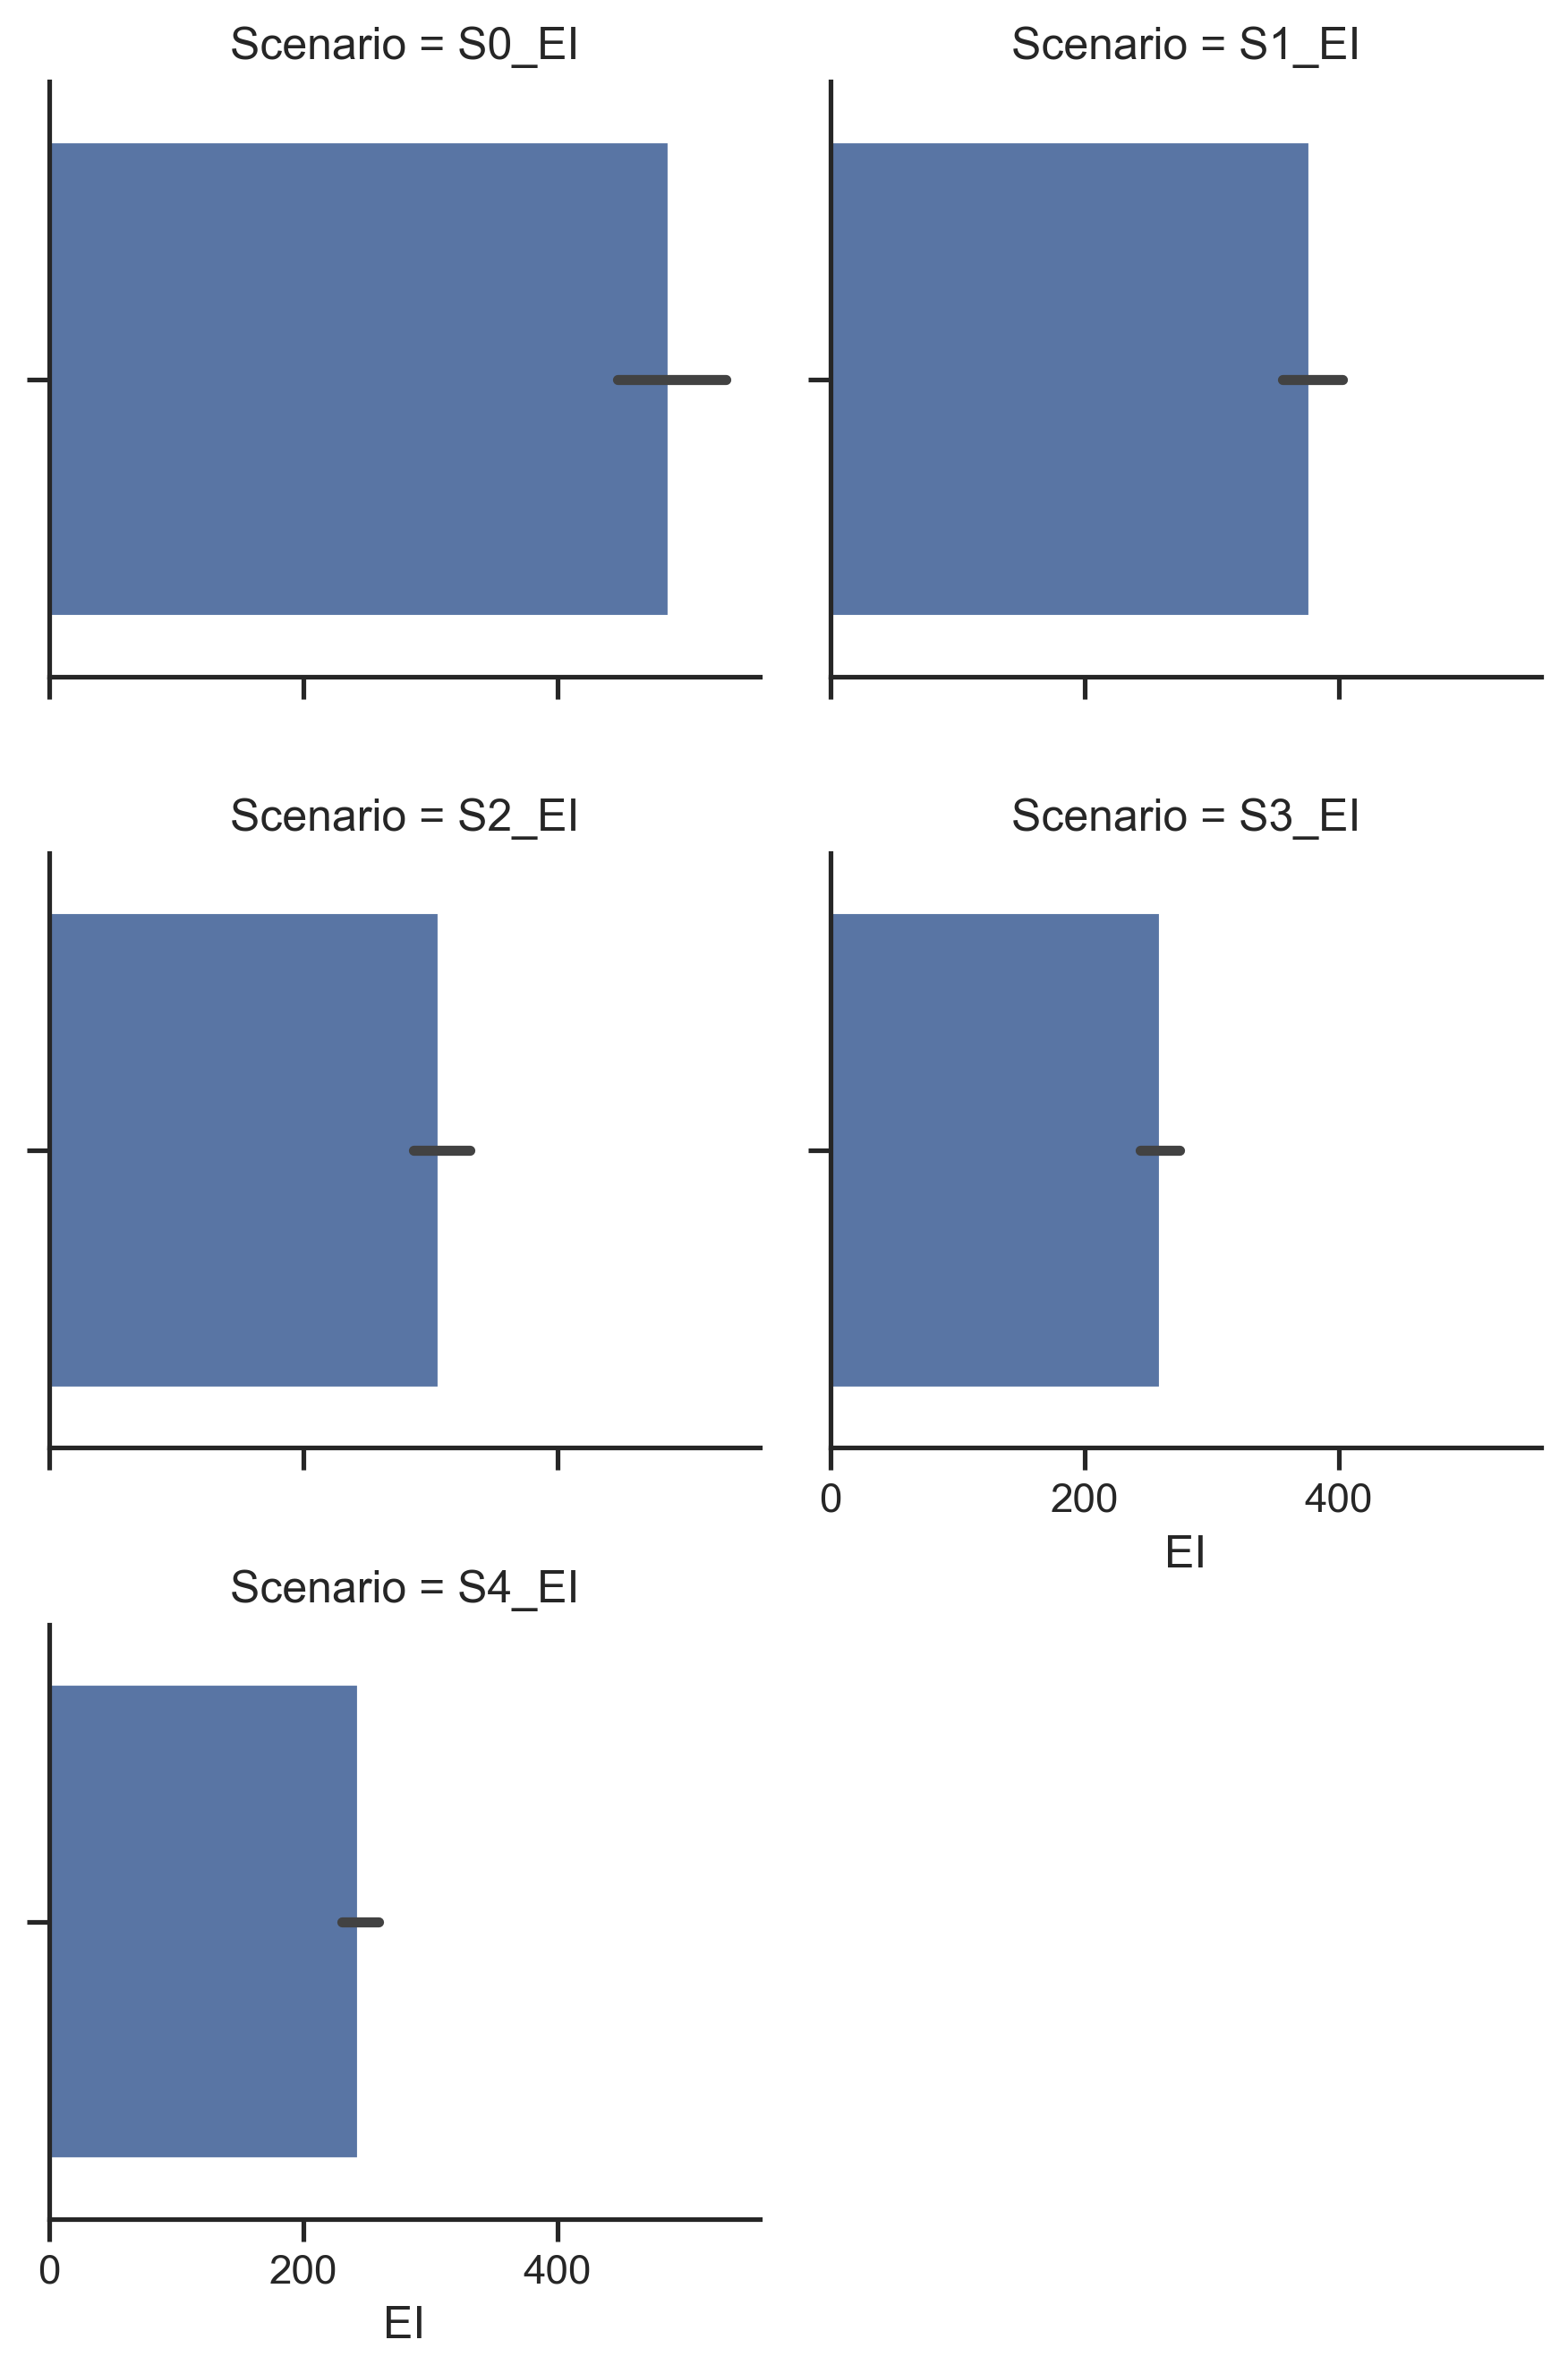

In [11]:
# Another way of plotting the data_melt
g = sns.catplot(data=data_melt, kind="bar", col="Scenario", col_wrap=2, x="EI", height=3)

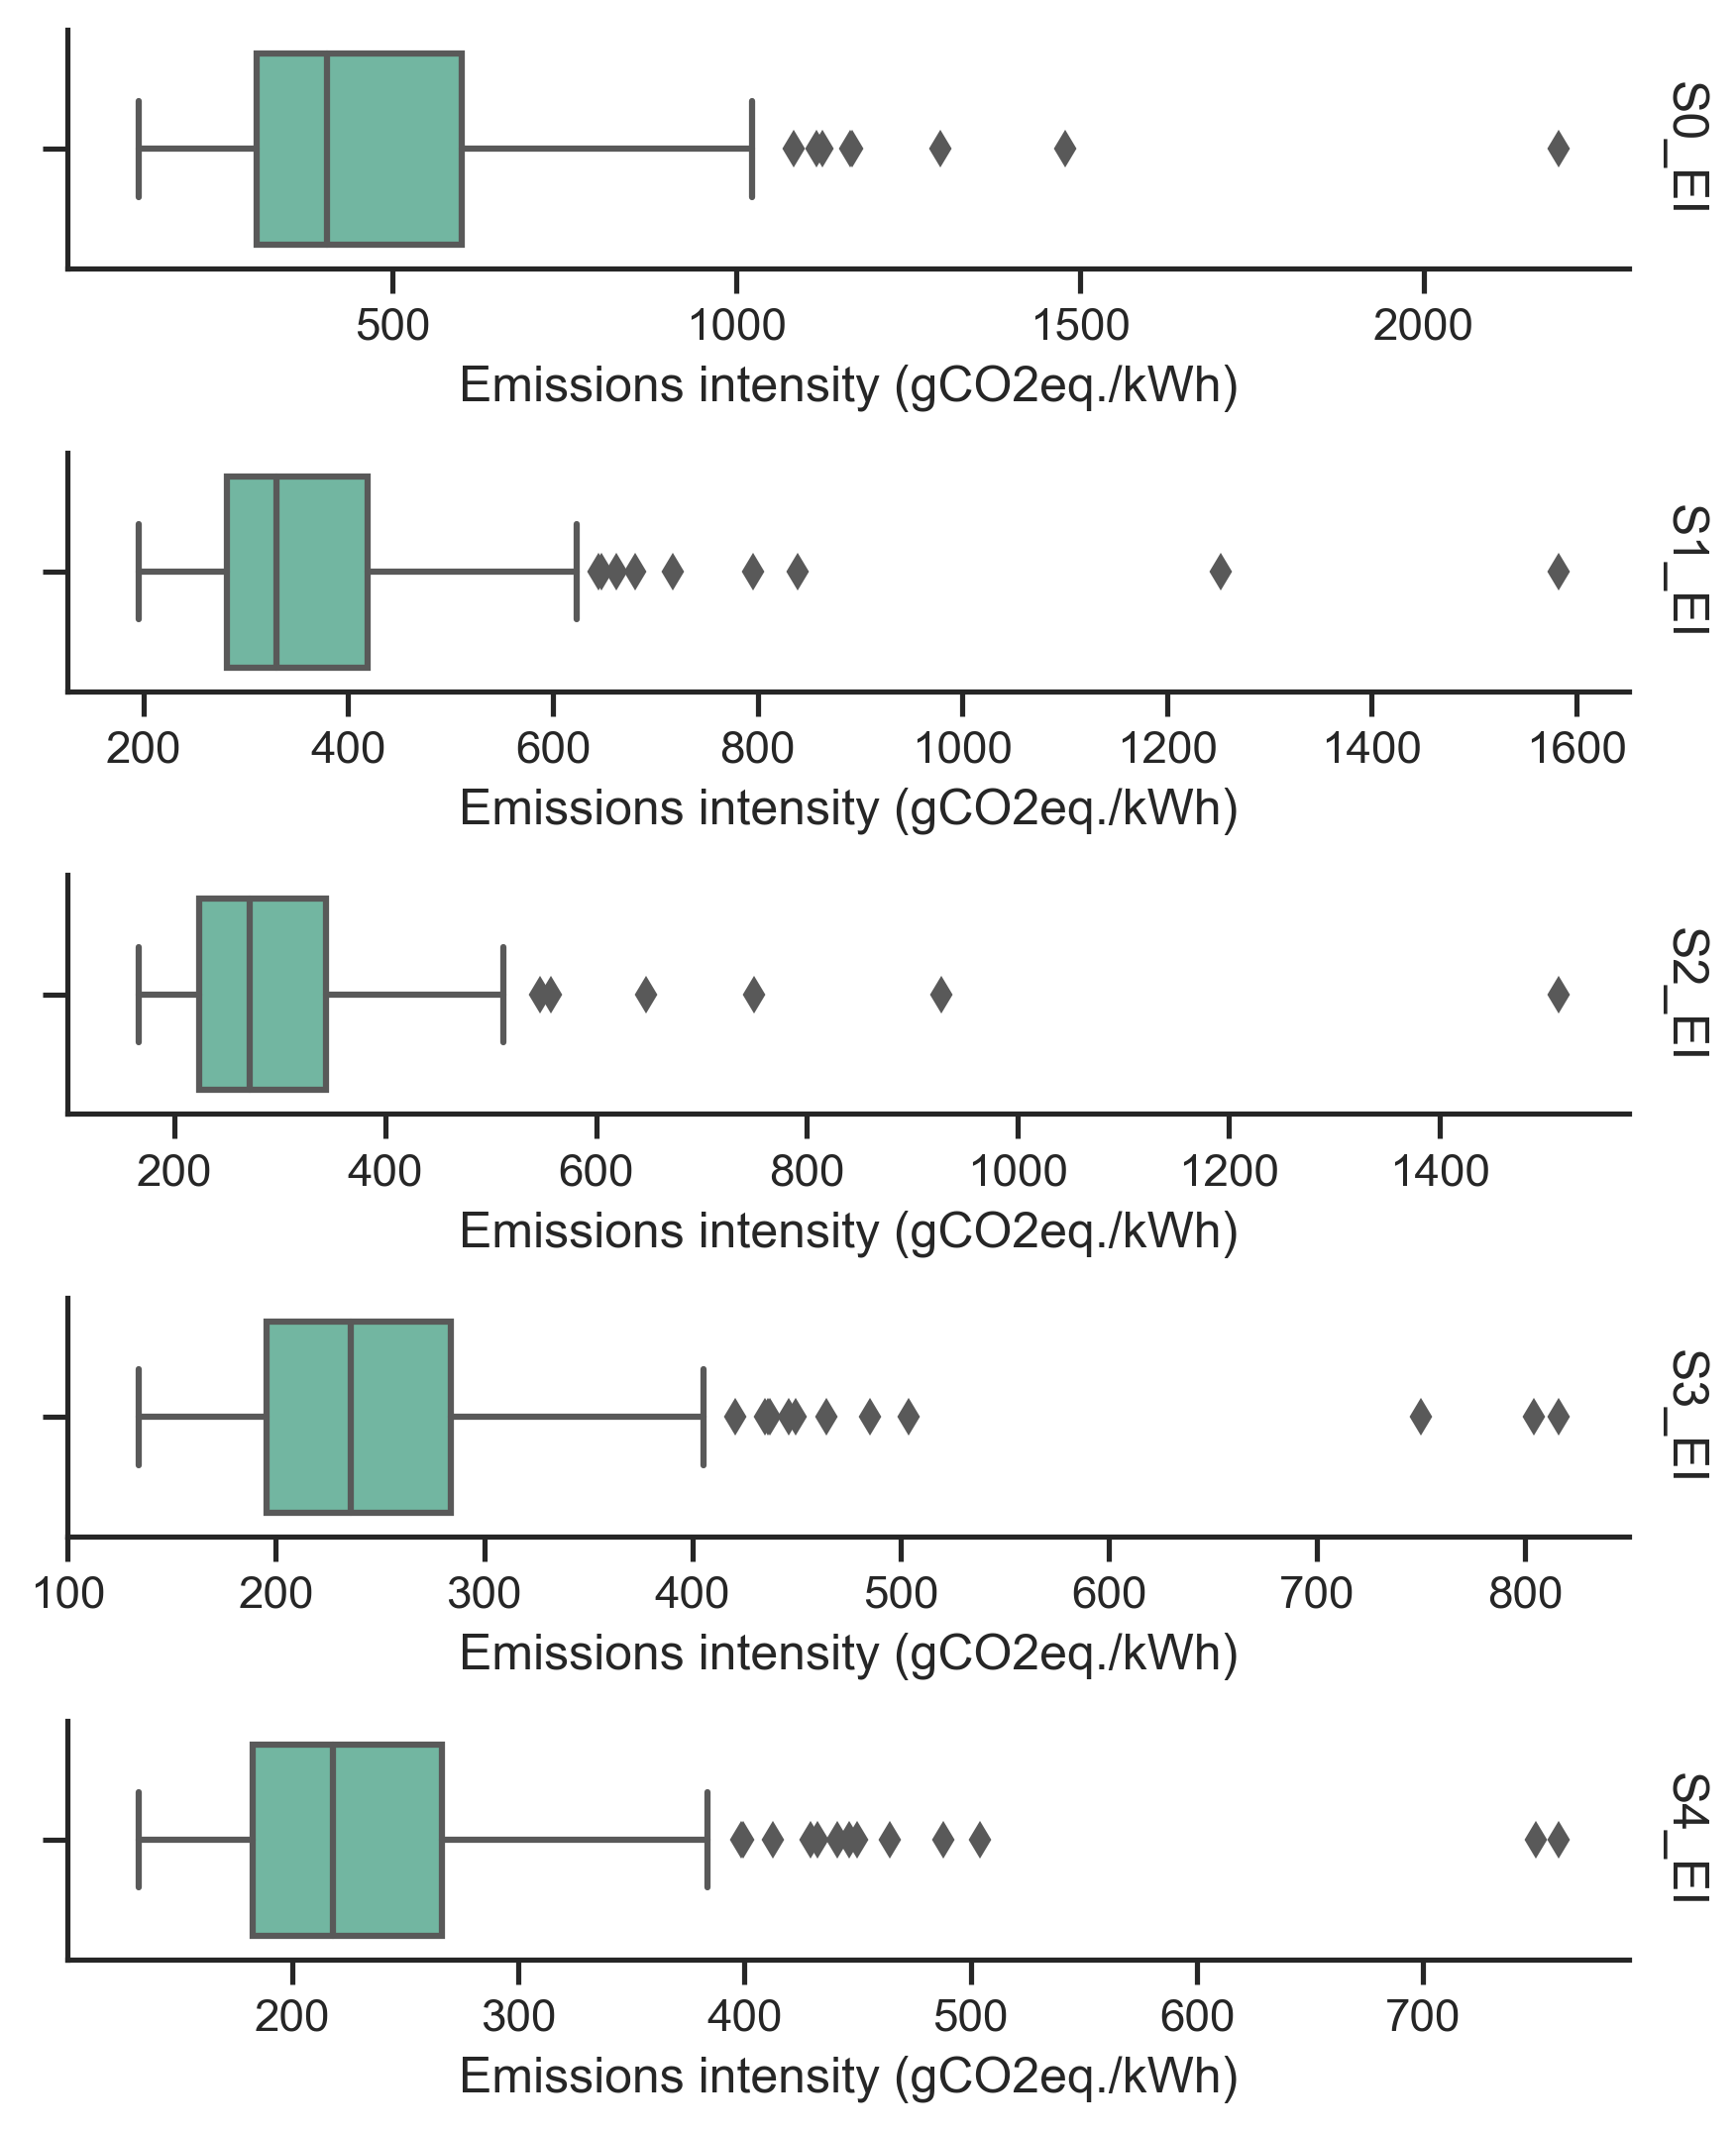

In [13]:
# Boxplots per scenario horizontally but need to change colors and edit scenarios labels - Not sharing x-axis
g = sns.catplot(data=data_melt, x="EI", row="Scenario", kind="box", hue="Scenario", palette="Set2", orient="h", sharex=False, margin_titles=True, height=1.5, aspect=4)
g.set(xlabel="Emissions intensity (gCO2eq./kWh)")
g.set_titles(row_template= "{row_name}")

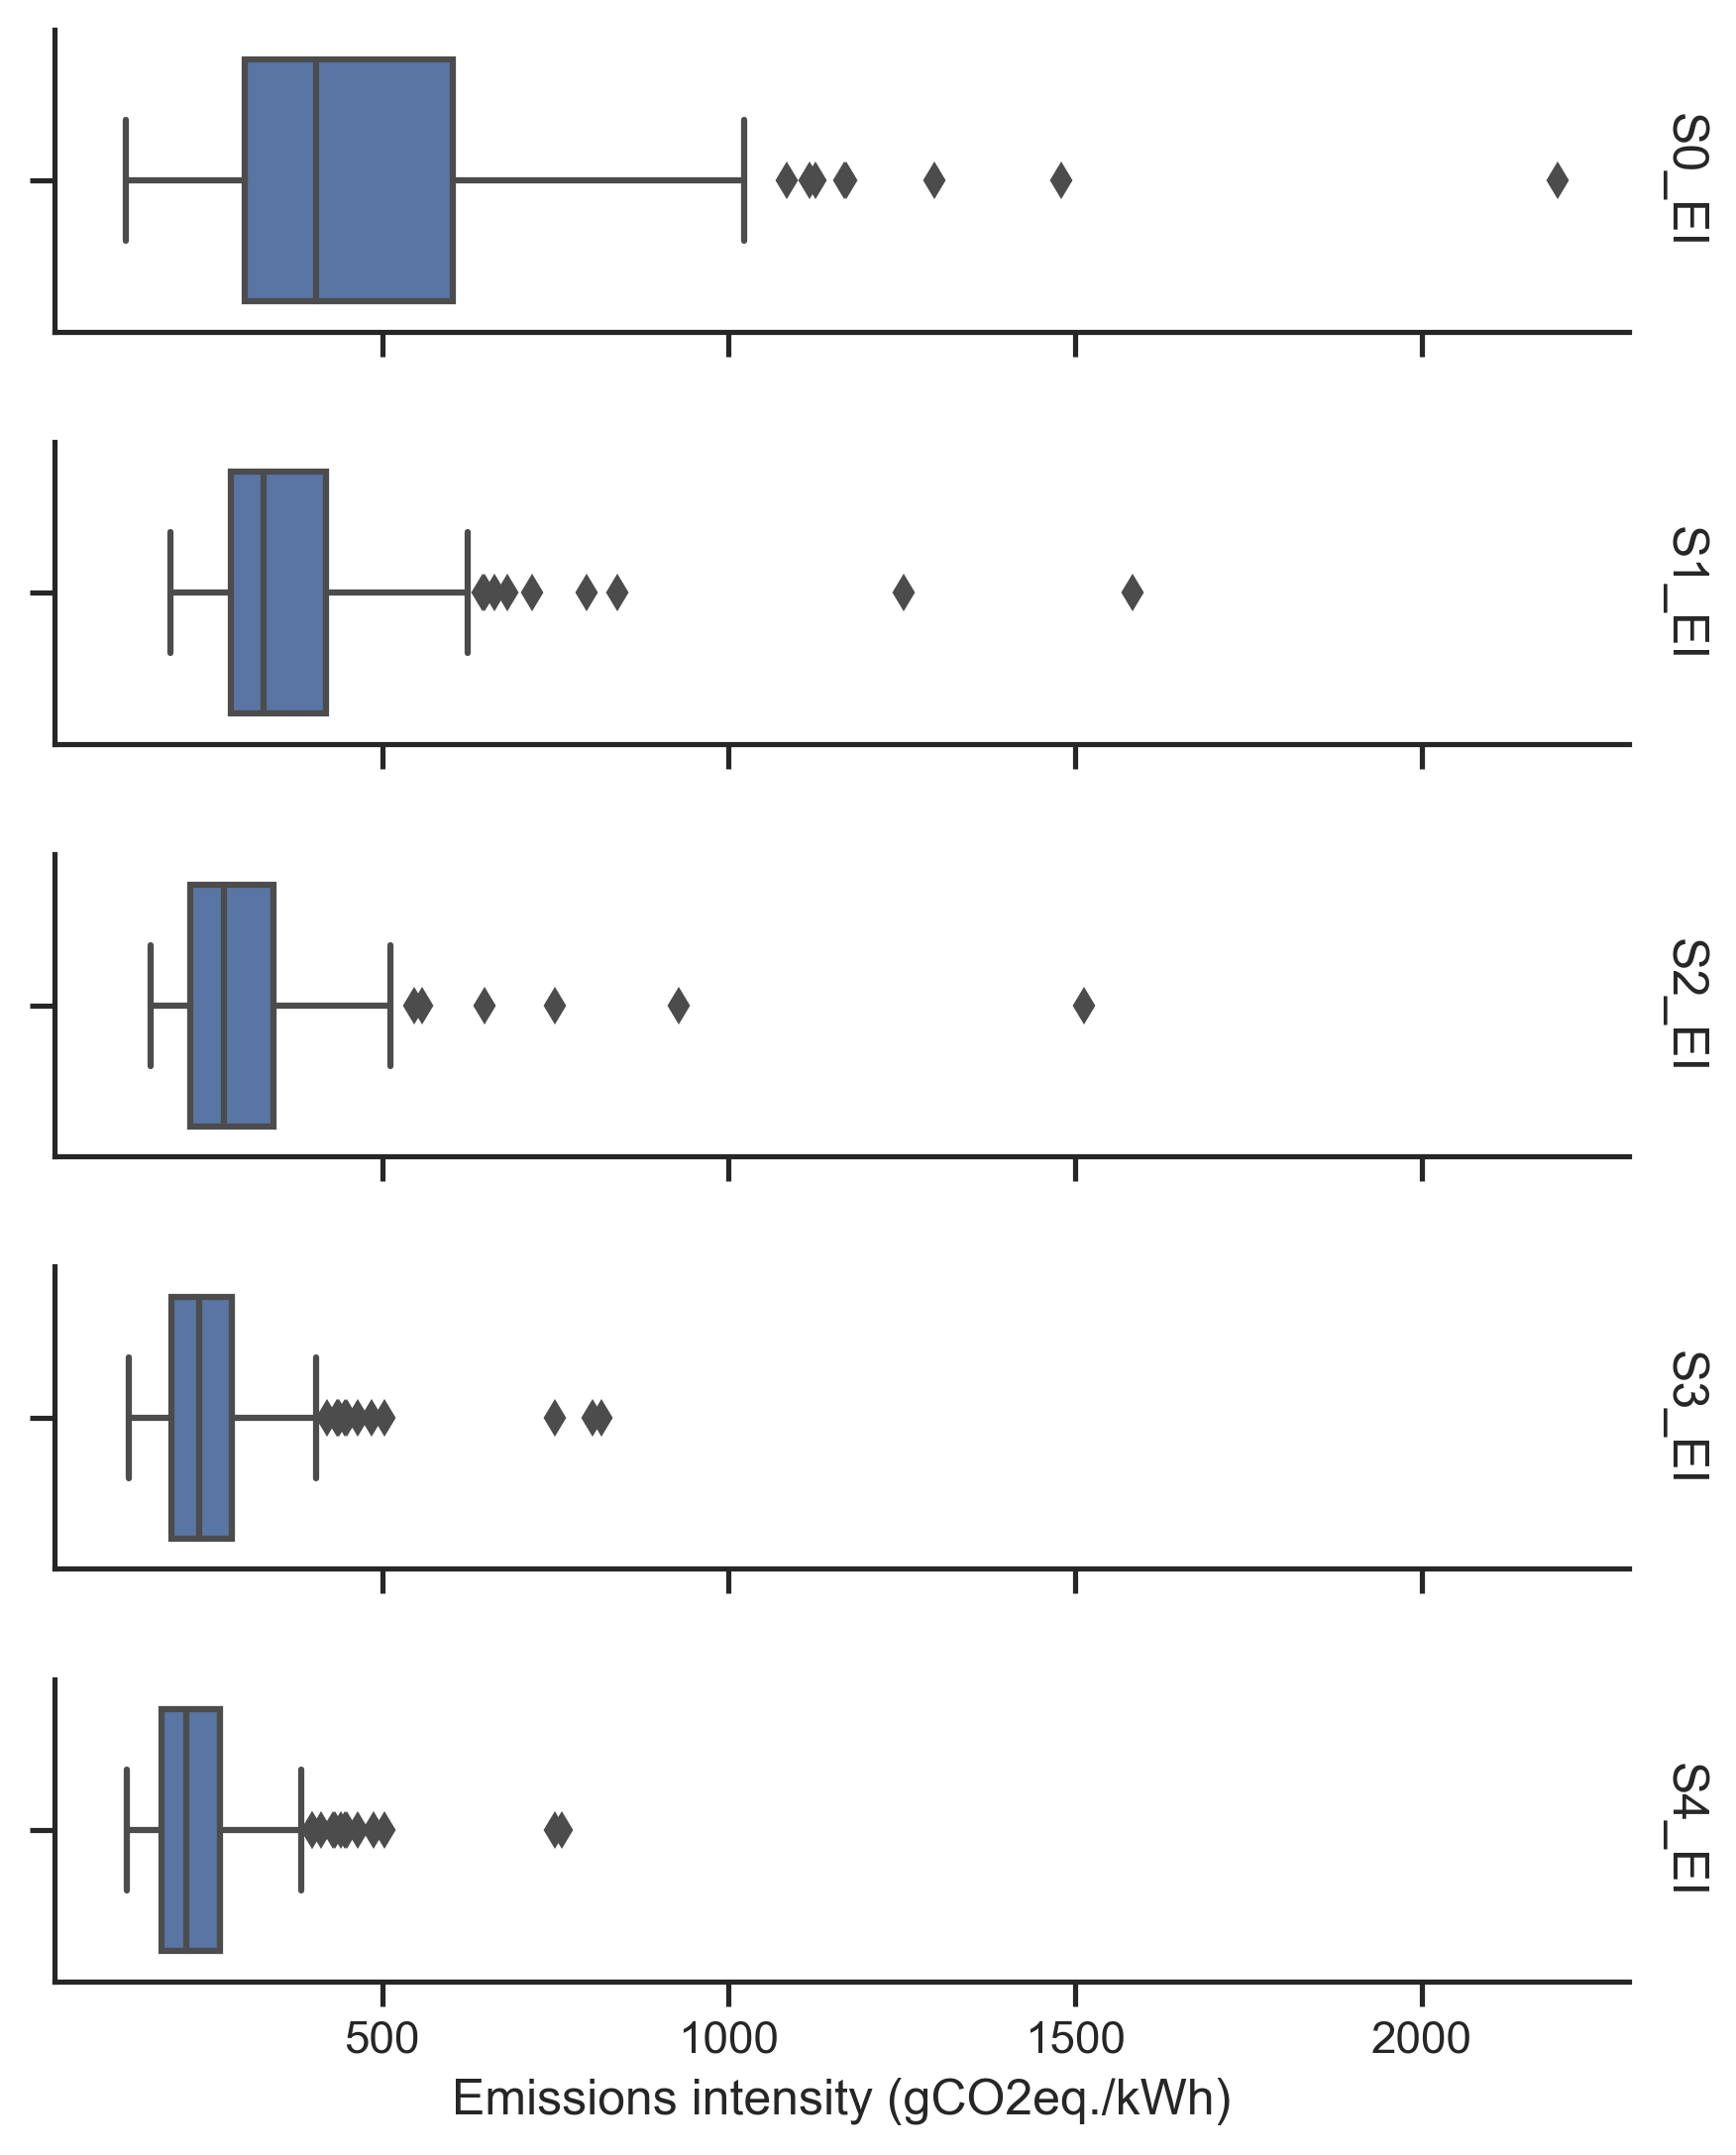

In [14]:
# As above but sharing x-axis, need to assign colours (doesn't work with: hue="Scenario", palette="Set2") and get rid of EI
g = sns.catplot(data=data_melt, x="EI", row="Scenario", kind="box", orient="h", sharex=True, margin_titles=True, height=1.5, aspect=4)
g.set(xlabel="Emissions intensity (gCO2eq./kWh)")
g.set_titles(row_template= "{row_name}")

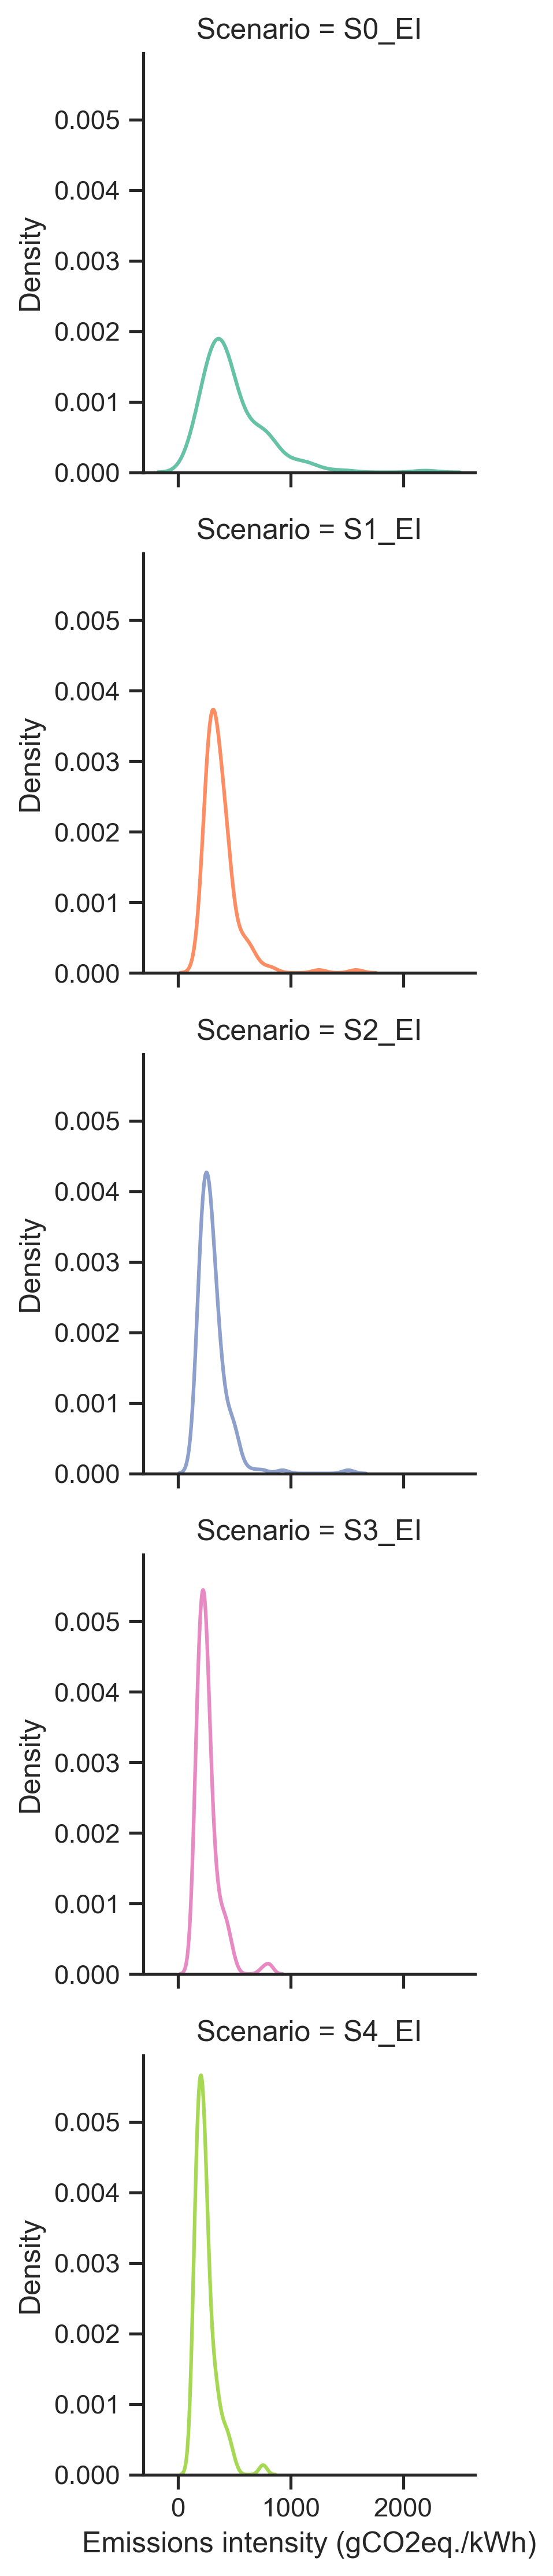

In [15]:
# kdeplot Facetgrid by row scenario - with colors 
g = sns.FacetGrid(data=data_melt, row="Scenario", hue="Scenario", palette="Set2") # margin_titles=True, height=1.5, aspect=4
g.map(sns.kdeplot, "EI")
g.set(xlabel="Emissions intensity (gCO2eq./kWh)")

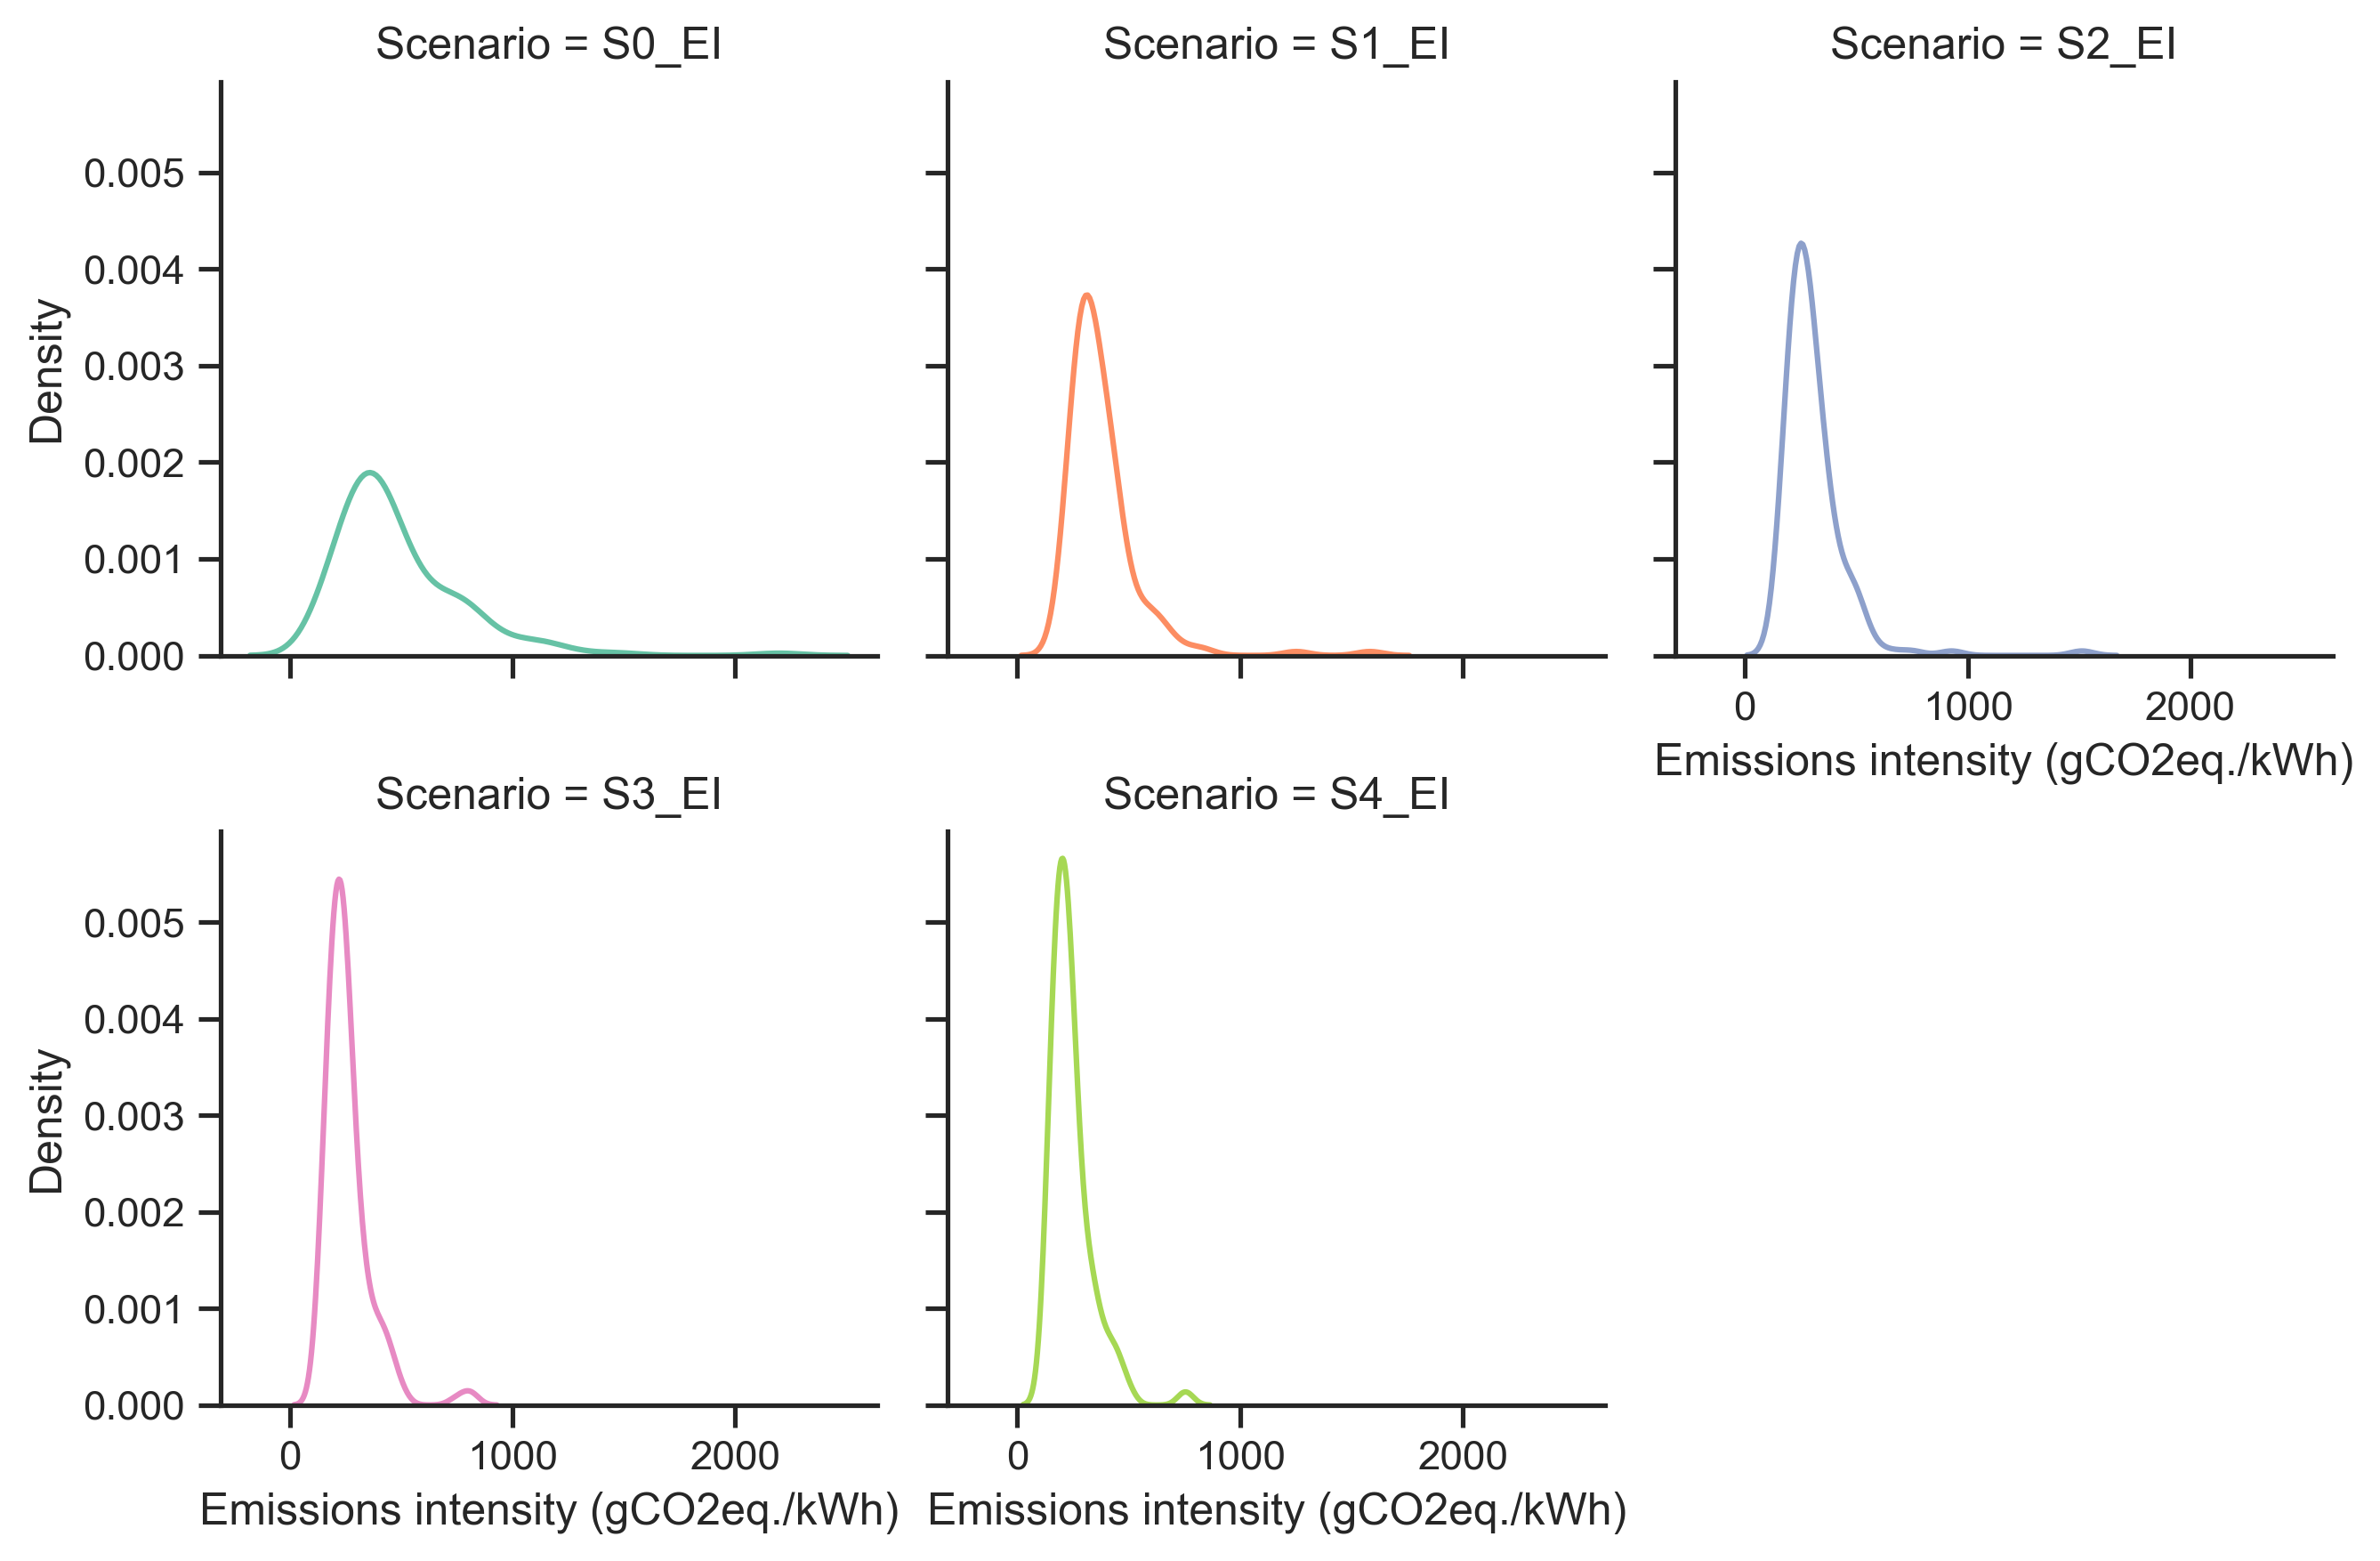

In [16]:
# kdeplot Facetgrid by column scenario - with colors 
g = sns.FacetGrid(data=data_melt, col="Scenario", hue="Scenario", palette="Set2", col_wrap=3) #or col_wrap=2
g.map(sns.kdeplot, "EI")
g.set(xlabel="Emissions intensity (gCO2eq./kWh)")

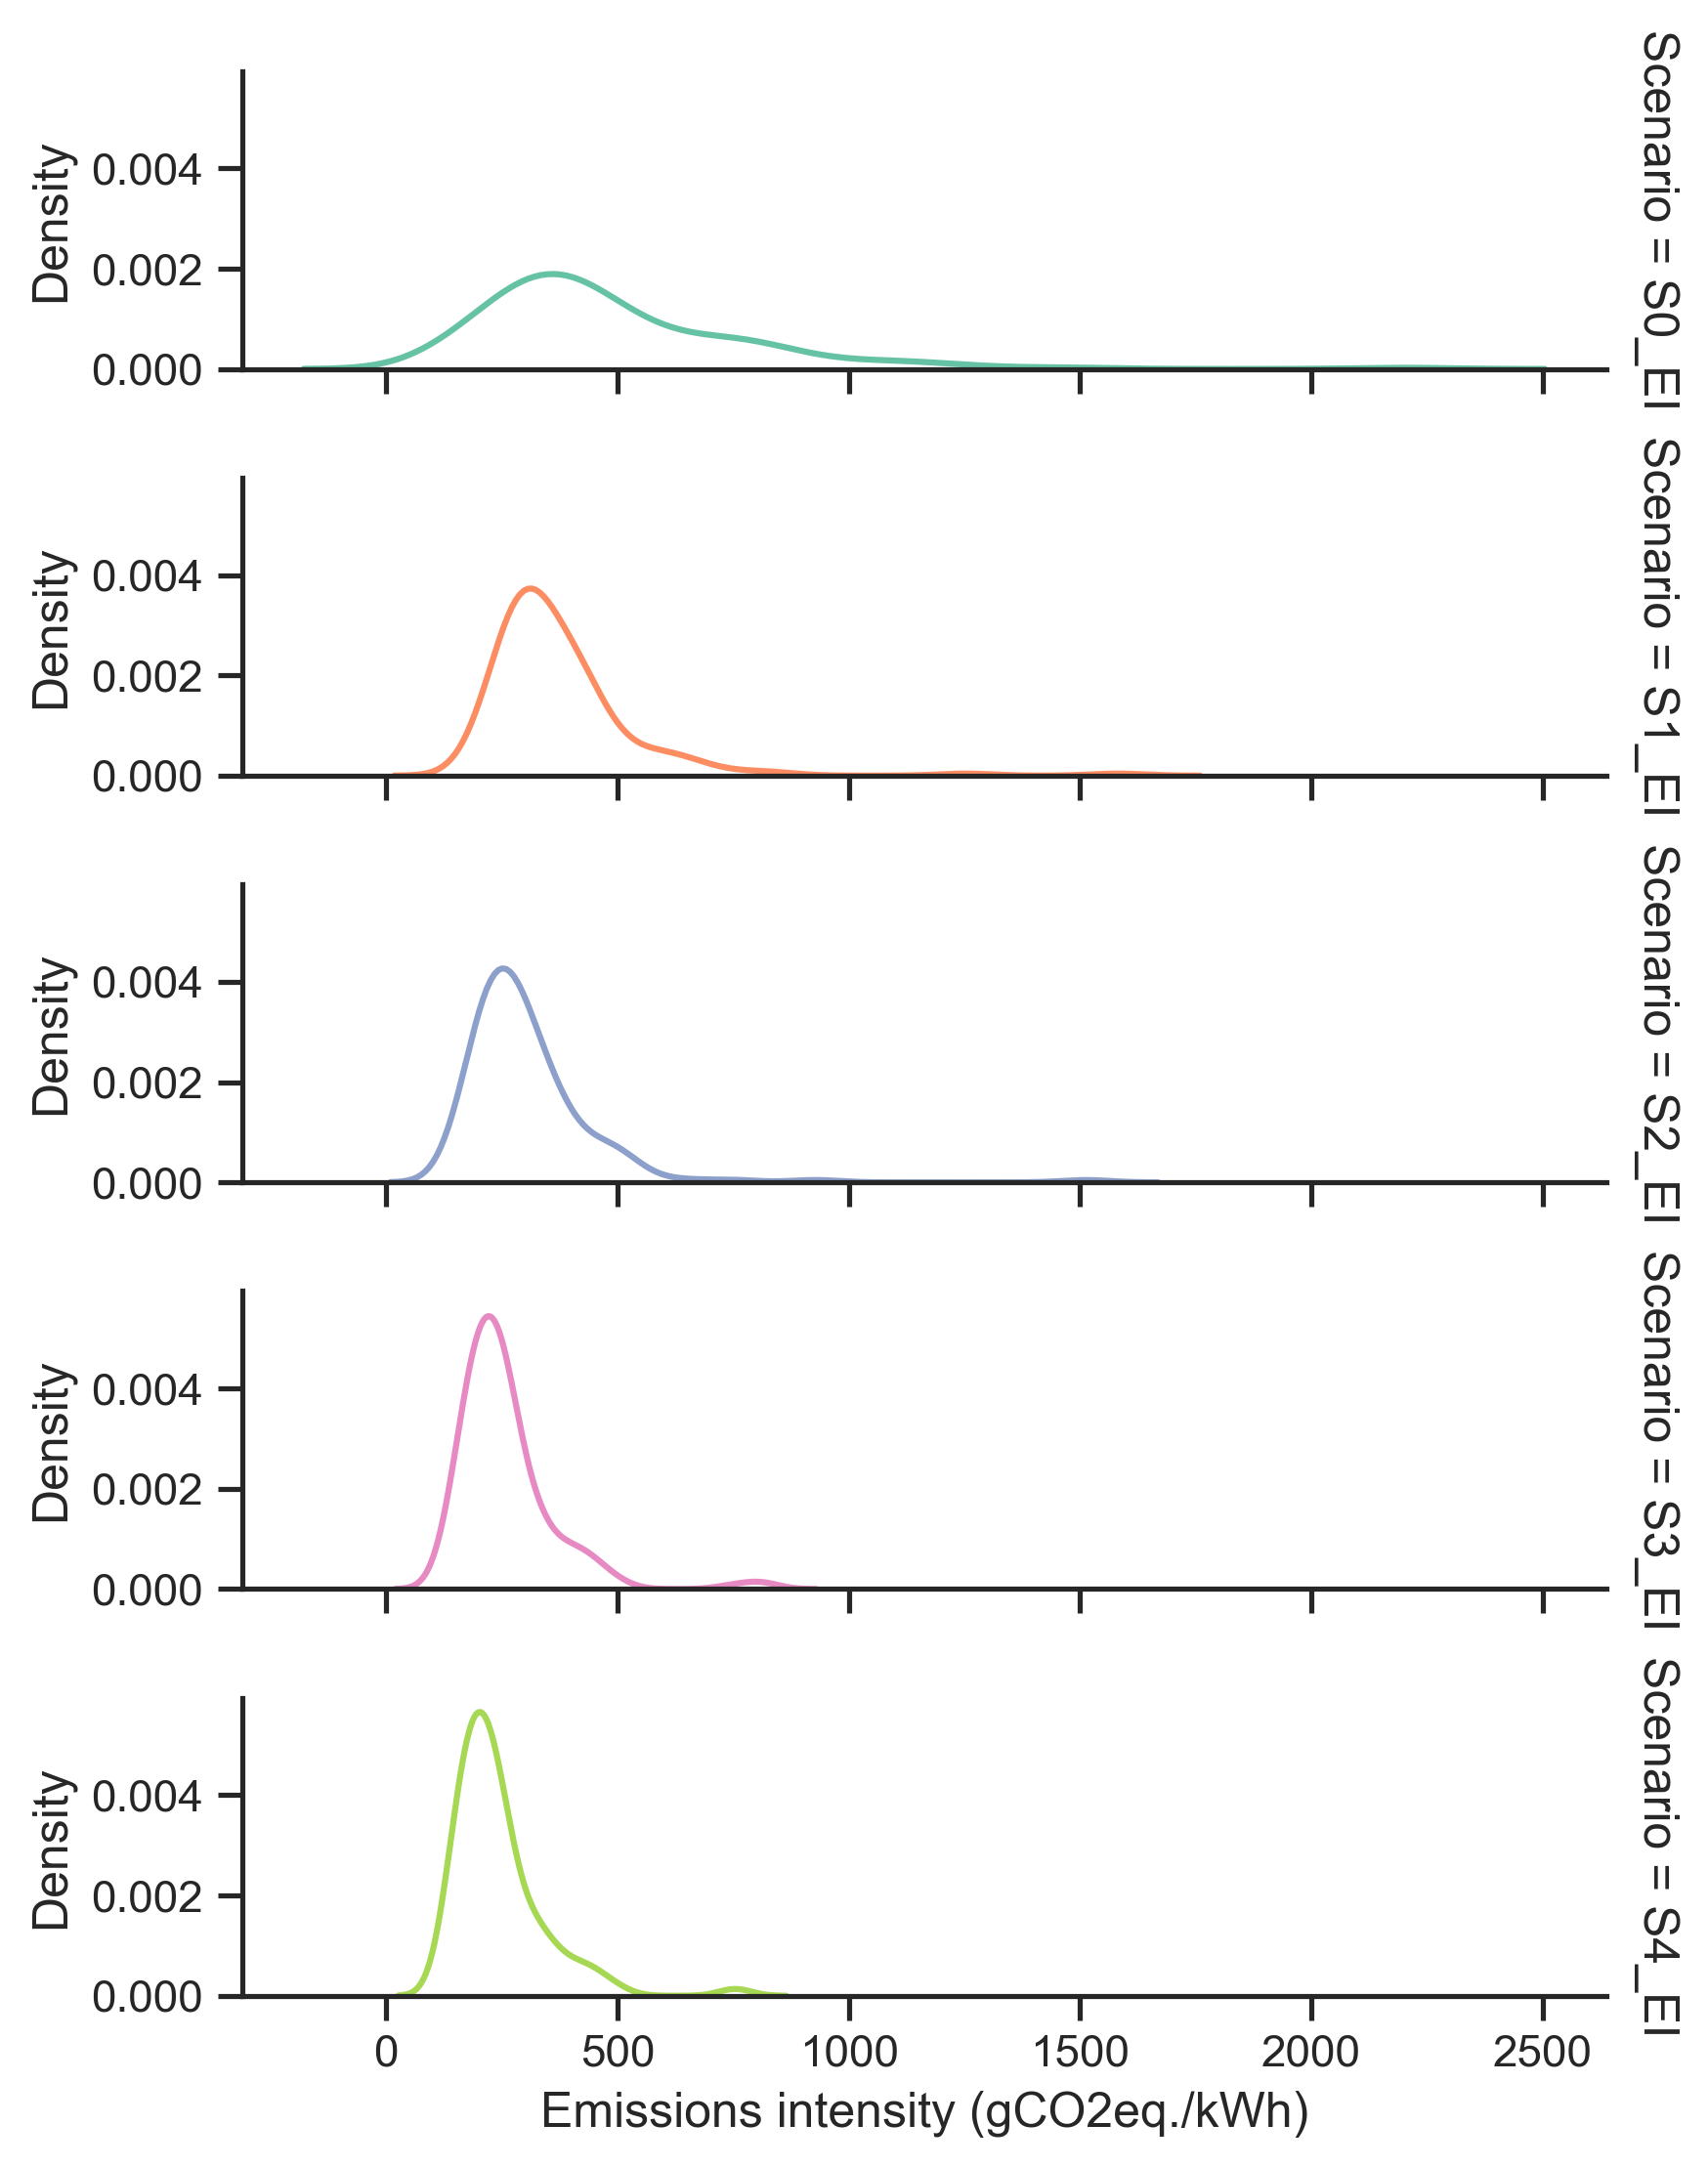

In [17]:
# kdeplot Facetgrid by row scenario - with colors and better format
g = sns.FacetGrid(data=data_melt, row="Scenario", hue="Scenario", palette="Set2", margin_titles=True, height=1.5, aspect=4)
g.map(sns.kdeplot, "EI")
g.set(xlabel="Emissions intensity (gCO2eq./kWh)")

In [ ]:
# More on df melt to convert to long-form data: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

# Note: This code is useful to see how to melt data to convert it in long-form (instead of wide-form) to 
# facilitate plotting. Also good to get the tables summarising stats of emissions intensity per scenario. 
# i copied it from the Spyder console into excel (see Info tab in excel 'Ch5 LCA Project Jua (9Jun23)')